In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/AREA.csv")

In [4]:
df.head()

x    y
0  202  150
1   62  204
2   35  246
3   32  126
4   53   89

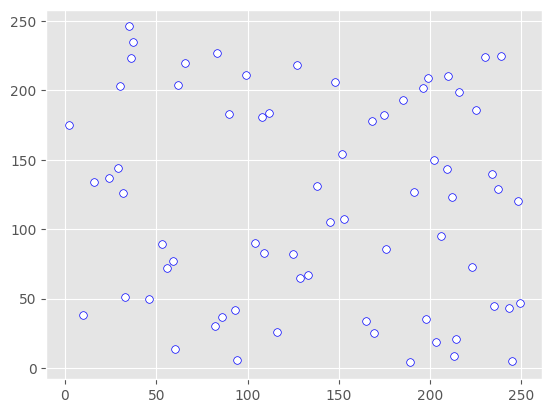

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline


plt.scatter(
    df["x"],df["y"],
    c='white',marker="o",
    edgecolor='blue', s=30
)


In [20]:
from sklearn.cluster import KMeans

num_of_cluster = 4

k = KMeans(n_clusters = num_of_cluster)
k.fit(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [21]:
centroids = k.cluster_centers_
label = k.labels_

In [22]:
centroids

array([[ 58.11764706, 191.23529412,   1.58823529],
       [ 85.16666667,  56.88888889,   3.33333333],
       [198.42857143, 168.47619048,   1.80952381],
       [209.14285714,  38.64285714,   3.71428571]])

In [23]:
label

array([2, 0, 0, 0, 1, 2, 3, 1, 2, 3, 3, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1,
       3, 3, 1, 2, 2, 3, 1, 1, 2, 0, 2, 2, 3, 2, 1, 1, 0, 2, 1, 3, 0, 0,
       2, 2, 0, 3, 0, 2, 2, 3, 0, 3, 0, 0, 3, 3, 0, 1, 3, 0, 1, 1, 1, 0,
       2, 0, 1, 1], dtype=int32)

In [24]:
df['labels']=label

In [25]:
df

x    y  labels
0   202  150       2
1    62  204       0
2    35  246       0
3    32  126       0
4    53   89       1
..  ...  ...     ...
65   83  227       0
66  230  224       2
67   90  183       0
68  104   90       1
69  133   67       1

[70 rows x 3 columns]

In [27]:

data=df

import random
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
get_colors(num_of_cluster)





initial_group = data[data['labels']==0].plot( kind='scatter', x='x', y='y', color=get_colors(num_of_cluster)[0], label="Cluster 1" )
#plt.scatter(centroids[0, 0],centroids[0, 1], marker = "x",color=get_colors(num_of_cluster)[i],s=150, linewidths = 2, zorder = 10)

for i in range(1,num_of_cluster):
   data[data['labels']==i].plot( kind='scatter', x='x', y='y', color=get_colors(num_of_cluster)[i], ax=initial_group, label="Cluster "+str(i+1) )
   #plt.scatter(centroids[i, 0],centroids[i, 1], marker = "x",color=get_colors(num_of_cluster)[i],s=150, linewidths = 2, zorder = 10)







initial_group.legend(loc='center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x",s=150, linewidths = 2, zorder = 10)

plt.show()
